In [5]:
import pandas as pd
import matplotlib.pyplot as plt

CNL_FILE = 'data/41586_2020_3052_MOESM4_ESM.txt'
cnl_df_raw = pd.read_table(CNL_FILE, sep='\t')
print('cnl_df\n', cnl_df_raw)

RL_FILE = 'data/41586_2020_3052_MOESM6_ESM.txt'
rl_df_raw = pd.read_table(RL_FILE, sep='\t')
print('rl_df\n', rl_df_raw)

TL_FILE = 'data/41586_2020_3052_MOESM8_ESM.txt'
tl_df_raw = pd.read_table(TL_FILE, sep='\t')
print('tl_df\n', tl_df_raw)

CHRV_FILE = 'data/41586_2020_3052_MOESM9_ESM.txt'
chrvl_df_raw = pd.read_table(CHRV_FILE, sep='\t')
print('chrvl_df\n', chrvl_df_raw)

LIBL_FILE = 'data/41586_2020_3052_MOESM11_ESM.txt'
libl_df_raw = pd.read_table(LIBL_FILE, sep='\t')
print('libl_df\n', libl_df_raw)

print(cnl_df_raw.keys())

cnl_df
        Sequence #                                           Sequence  \
0               1  TTTCTTCACTTATCTCCCACCGTCCACTCATGCGGGTGCTATGATA...   
1               2  TTTCTTCACTTATCTCCCACCGTCCGGATCTATAACGAAATGTCAA...   
2               3  TTTCTTCACTTATCTCCCACCGTCCATCAATAATTTATGTTCTTAA...   
3               4  TTTCTTCACTTATCTCCCACCGTCCAAAATAATTAGAAAGTAGCAC...   
4               5  TTTCTTCACTTATCTCCCACCGTCCCTTGAGAACCAAAAAAAAAAA...   
...           ...                                                ...   
19902       19903  TTTCTTCACTTATCTCCCACCGTCCCTTATTGTGAACATCATGACA...   
19903       19904  TTTCTTCACTTATCTCCCACCGTCCTTTGTTATTTTTATTAGTAGA...   
19904       19905  TTTCTTCACTTATCTCCCACCGTCCAGCAAGCAATAGCTGCAACAT...   
19905       19906  TTTCTTCACTTATCTCCCACCGTCCCTTATAACTCTATATTAATCC...   
19906       19907  TTTCTTCACTTATCTCCCACCGTCCGGTAAATGGCACAAGTAATAG...   

        Cyclizability (n=26)   Cyclizability (n=29)   Cyclizability (n=31)  \
0                   0.406731              -0.1062

## Preprocessing
- Use Columns: Sequence #, Sequence, C0 
- Get rid of 25 bp left and right adapters 
- Save in csv format 

In [7]:
def preprocess(df, file_name):
    columns = ["Sequence #", "Sequence", " C0"]
    df = df[columns]
    df.columns = ["Sequence #", "Sequence", "C0"]
    
    for i in range(len(df)):
        df.at[i, 'Sequence'] = df['Sequence'][i][25:-25] 
    
    df.to_csv(f'data/{file_name}.csv', index=False)
    
    return df

cnl_df = preprocess(cnl_df_raw, 'cnl')
rl_df = preprocess(rl_df_raw, 'rl')
tl_df = preprocess(tl_df_raw, 'tl')
chrvl_df = preprocess(chrvl_df_raw, 'chrvl')
libl_df = preprocess(libl_df_raw, 'libl')

print(cnl_df)

       Sequence #                                           Sequence        C0
0               1  ACTCATGCGGGTGCTATGATACAATTATATCTTATTTCCATTCCCA...  0.061849
1               2  GGATCTATAACGAAATGTCAAATAATTTTACGGTAATATAACTTAT... -0.285112
2               3  ATCAATAATTTATGTTCTTAACCTAACATTTGATGACCTTTGATGC...  1.114780
3               4  AAAATAATTAGAAAGTAGCACAATTTTTACAGTAATGTAGCACGCG...  0.414965
4               5  CTTGAGAACCAAAAAAAAAAAAAAAAAAATACTGATCCTTACAGGT...  0.353268
...           ...                                                ...       ...
19902       19903  CTTATTGTGAACATCATGACAAAACGAAATGAGAAAAGACCTTTCC... -0.741148
19903       19904  TTTGTTATTTTTATTAGTAGAGGTTATCAATTTATCCACGAAATTG...  0.090459
19904       19905  AGCAAGCAATAGCTGCAACATTTGGGCCGTTGCTAGAAGTTCCAAT... -0.828450
19905       19906  CTTATAACTCTATATTAATCCAAGTTCACCCTAAAAACAGATAAAA...  1.384206
19906       19907  GGTAAATGGCACAAGTAATAGACAATTTAATGAATAGGGTGTTATG...  0.100711

[19907 rows x 3 columns]


# Visulization
- Histogram

array([[<AxesSubplot:title={'center':'C0'}>]], dtype=object)

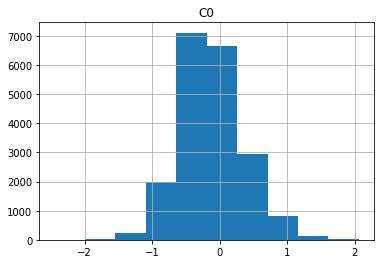

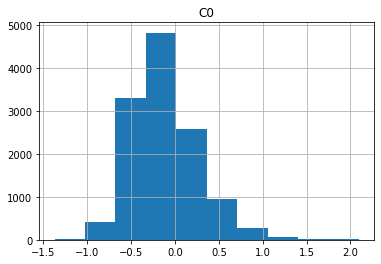

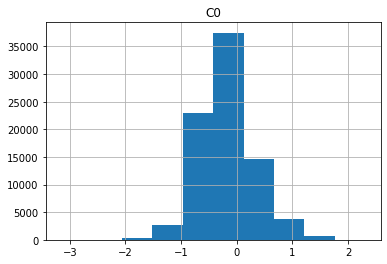

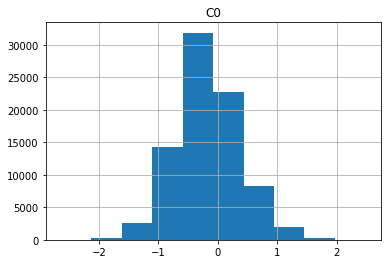

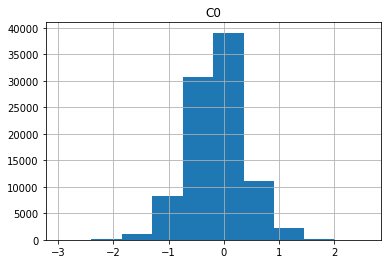

In [9]:
cnl_df.hist(column=['C0'])
rl_df.hist(column=['C0'])
tl_df.hist(column=['C0'])
chrvl_df.hist(column=['C0'])
libl_df.hist(column=['C0'])

# Comparison of C0 values of same sequences


Pearsons correlation: 0.769
r2 score:  0.4896560764632393


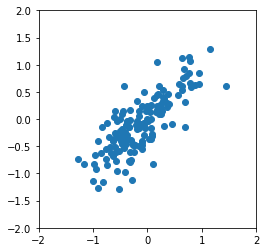

In [16]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

def get_intersection(df1, df2):
    merged_df = pd.merge(df1, df2, how='inner', on=['Sequence'])
    merged_df.columns = merged_df.columns.str.replace('_','')

    return merged_df 

# CNL - TL; CNL - ChrV; RL - LibL 
common_df = get_intersection(cnl_df, chrvl_df)
print()
plt.scatter(common_df['C0x'], common_df['C0y'])
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
corr, _ = pearsonr(common_df['C0x'], common_df['C0y'])
print('Pearsons correlation: %.3f' % corr)

print('r2 score: ', r2_score(common_df['C0x'], common_df['C0y']))

In [15]:
print(len(cnl_df['Sequence'][1]))

50
